In [1]:
import os
%cd ..
%cd ..
os.getcwd()

/Users/macbook/Documents/Code/uni-guider/src
/Users/macbook/Documents/Code/uni-guider


'/Users/macbook/Documents/Code/uni-guider'

In [5]:
%pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


In [4]:
import faiss

dim = len(hf.embed_query("Xin chào."))  # Get actual embedding dimension
index = faiss.IndexFlatL2(dim)     

: 

In [8]:
import faiss

index = faiss.IndexFlatL2(768)

In [17]:
import src.chatbot.evaluation
import importlib
importlib.reload(src.chatbot.evaluation)
from src.chatbot.evaluation import calculate_mrr
from src.chatbot.utils import *
import pandas as pd
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
from uuid import uuid4
from src.chatbot.rag.config import LLM_CONFIG, EMBEDDING_CONFIG
from src.chatbot.rag.retrieval import retrieve_documents


In [11]:
data = load_doc_from_json(filename="data/chunking_documents.json")

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings
from src.chatbot.rag.config import LLM_CONFIG, EMBEDDING_CONFIG

model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
hf = HuggingFaceEmbeddings(
    model_name=EMBEDDING_CONFIG["model_name"],
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)


In [6]:
len(hf.embed_query("Xin chao"))

768

In [20]:
import pandas as pd
eval_data_full = pd.read_csv("data/eval_dataset_with_score.csv")
eval_data = eval_data_full[eval_data_full['score'] >= 3]
eval_data

,context,question,answer,source_doc,evaluation,score
0,Chương trình học bổng Daizo Tec năm học 2023-2...,Điểm trung bình tích lũy cần đạt để nhận học b...,Từ 3.0 trở lên,https://ctsv.hust.edu.vn/#/hoc-bong/92/chi-tiet,Ngữ cảnh nêu rõ điểm trung bình tích lũy cần đ...,5
1,Điểm rèn luyện kì 20212 từ 70 trở lên. Ưu tiên...,Học bổng Daizo Tec năm 2023-2024 trị giá bao n...,600 USD/suất.,https://ctsv.hust.edu.vn/#/hoc-bong/92/chi-tiet,Ngữ cảnh nêu rõ trị giá học bổng Daizo Tec là ...,5
2,Học bổng Khuyến khích học tập học kỳ I năm học...,Học bổng Khuyến khích học tập là của học kỳ nào?,học kỳ I năm học 2022-2023,https://ctsv.hust.edu.vn/#/hoc-bong/91/chi-tiet,Ngữ cảnh cung cấp rõ ràng thông tin về học kỳ ...,5
4,Chương trình học bổng LG Display năm học 2022-...,Học bổng LG Display 2022-2023 trị giá bao nhiêu?,35.000.000 VND/suất.,https://ctsv.hust.edu.vn/#/hoc-bong/85/chi-tiet,Ngữ cảnh cung cấp thông tin rõ ràng và chính x...,5
5,- Sinh viên sau khi có kết quả xét vòng thứ 1 ...,Nộp hồ sơ bản cứng học bổng LG Display khi nào?,Sau khi có kết quả phỏng vấn.,https://ctsv.hust.edu.vn/#/hoc-bong/85/chi-tiet,Ngữ cảnh nêu rõ thời điểm nộp hồ sơ bản cứng l...,5
...,...,...,...,...,...,...
153,Chương trình học bổng hỗ trợ học tập (HTHT) ch...,Học bổng hỗ trợ học tập (HTHT) dành cho đối tư...,sinh viên K64 (Đợt 2),https://ctsv.hust.edu.vn/#/hoc-bong/7/chi-tiet,"Ngữ cảnh chỉ rõ học bổng dành cho ""sinh viên K...",4
154,"Hướng dẫn về BHYT và sử dụng thẻ BHYT khám, ch...",Số tài khoản nộp tiền BHYT các đợt bổ sung là gì?,1222113656,https://ctsv.hust.edu.vn/#/so-tay-sv/70/huong-...,Ngữ cảnh cung cấp rõ ràng số tài khoản và thôn...,5
155,2. Đối với sinh viên khóa mới nhập học - K69:\...,Địa điểm khám chữa bệnh BHYT ban đầu cho sinh ...,Trung Tâm Y tế Bách Khoa số 5 Phố Tạ Quang Bửu.,https://ctsv.hust.edu.vn/#/so-tay-sv/70/huong-...,Ngữ cảnh cung cấp rõ ràng địa điểm đăng ký khá...,5
156,Sổ khám bệnh (nếu có). Chú ý:\nTrường hợp muốn...,Địa điểm đổi nơi khám chữa bệnh ban đầu BHYT ở...,Bảo hiểm xã hội Quận Hai Bà Trưng (số 106 phố ...,https://ctsv.hust.edu.vn/#/so-tay-sv/70/huong-...,Ngữ cảnh cung cấp rõ ràng địa điểm cụ thể để t...,5


In [12]:
# index = faiss.IndexFlatL2(len(hf.embed_query("Xin chào.")))
vectorstore = FAISS(
    embedding_function=hf,
    index = index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

uuids = [str(uuid4()) for _ in range(len(data))]
vectorstore.add_documents(documents=data, ids=uuids)
retriever = vectorstore.as_retriever(search_kwargs={"k": 10})

In [15]:
eval_questions = list(eval_data['question'])
eval_ground_truth = list(eval_data['context'])
eval_ground_truth
eval_answers = list(eval_data['answer'])

In [18]:
retrieve_documents??

Signature: retrieve_documents(query: str, retriever) -> List[langchain_core.documents.base.Document]
Docstring: <no docstring>
Source:   
def retrieve_documents(query: str, retriever) -> List[Document]:
    docs = retriever.invoke(query)

    segmented_question = tokenize(query)
    segmented_documents = [tokenize(doc.page_content) for doc in docs]
    tokenized_pairs = [[segmented_question, sent] for sent in segmented_documents]

    scores = model.predict(tokenized_pairs)
    top_ids = np.argsort(scores)[::-1][:5]
    top_documents = [docs[i] for i in top_ids]
    return top_documents
File:      ~/Documents/Code/uni-guider/src/chatbot/rag/retrieval.py
Type:      function

In [19]:
responses_list = []
for eval_question in eval_questions:
    responses = []
    res_list = [doc.page_content for doc in retrieve_documents(eval_question, retriever)]
    responses.extend(res_list)
    responses_list.append(responses)

In [26]:
import src.chatbot.evaluation
import importlib
importlib.reload(src.chatbot.evaluation)
from src.chatbot.evaluation import calculate_mrr, hit_rate_at_k
print(calculate_mrr(responses_list, eval_ground_truth))
hit_rate_at_k(responses_list, eval_ground_truth, k = 3)

0.5050781249999999


0.6015625

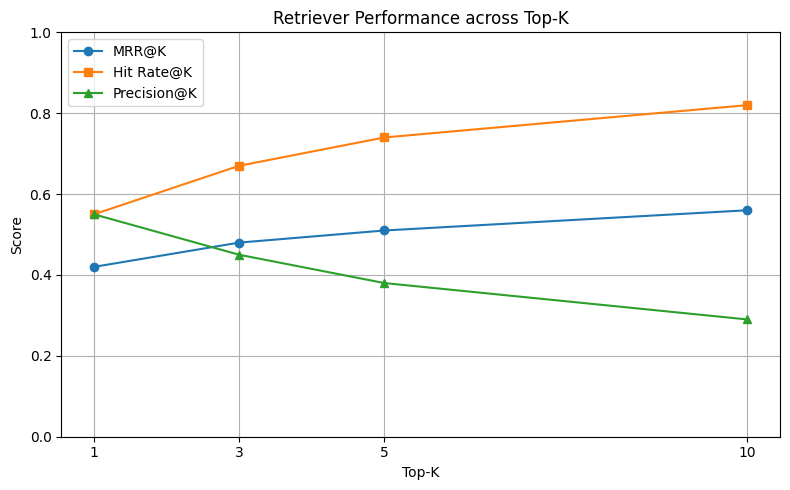

In [27]:
import matplotlib.pyplot as plt
top_ks = [1, 3, 5, 10]
mrr = [0.42, 0.48, 0.51, 0.56]
hit_rate = [0.55, 0.67, 0.74, 0.82]
precision = [0.55, 0.45, 0.38, 0.29]

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(top_ks, mrr, marker='o', label='MRR@K')
plt.plot(top_ks, hit_rate, marker='s', label='Hit Rate@K')
plt.plot(top_ks, precision, marker='^', label='Precision@K')
plt.xlabel('Top-K')
plt.ylabel('Score')
plt.title('Retriever Performance across Top-K')
plt.xticks(top_ks)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("retriever_metrics.png", dpi=300)
plt.show()